Import Library

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

Segmentasi

In [2]:
def liver_segmentation(image):
    """
    Fungsi untuk segmentasi hati menggunakan adaptive threshold dan filtering.
    """
    # Konversi ke grayscale
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

    # Thresholding dengan Otsu untuk segmentasi yang lebih adaptif
    _, thresholded = cv2.threshold(gray, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)

    # Menggunakan morphological closing untuk memperhalus hasil segmentasi
    kernel = np.ones((7, 7), np.uint8)
    morph = cv2.morphologyEx(thresholded, cv2.MORPH_CLOSE, kernel)

    return morph

Deteksi anomali

In [3]:
def detect_abnormalities(liver_mask, original_image):
    """
    Fungsi untuk mendeteksi area abnormal berdasarkan segmentasi.
    """
    # Ambil area yang tersegmentasi
    contours, _ = cv2.findContours(liver_mask, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

    # Gambarkan kontur pada gambar asli
    result_image = original_image.copy()
    for cnt in contours:
        area = cv2.contourArea(cnt)
        if area > 1000:  # Hanya pertimbangkan area signifikan
            cv2.drawContours(result_image, [cnt], -1, (0, 255, 0), 2)

    return result_image

Import Image

In [7]:
image_path = '/content/k.png'
image = cv2.imread(image_path)


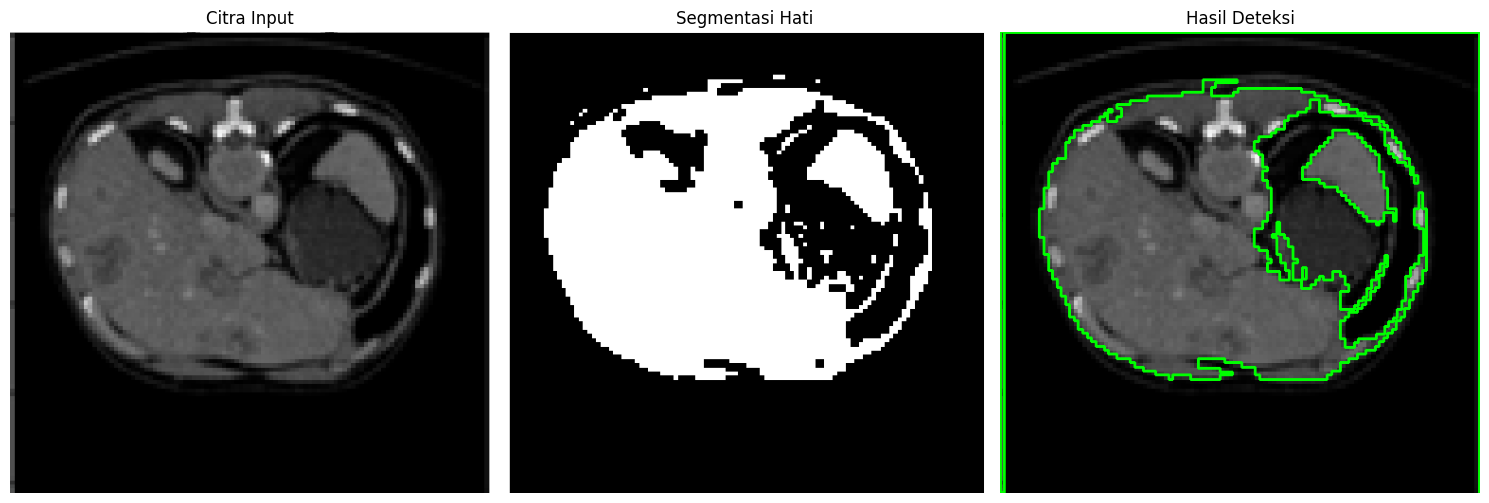

In [8]:
# Cek apakah gambar berhasil dimuat
if image is None:
    print("Gagal memuat gambar. Pastikan path benar.")
else:
    # Segmentasi hati
    liver_mask = liver_segmentation(image)

    # Deteksi area abnormal
    result = detect_abnormalities(liver_mask, image)

    # Visualisasi hasil
    plt.figure(figsize=(15, 5))
    plt.subplot(1, 3, 1)
    plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    plt.title("Citra Input")
    plt.axis("off")

    plt.subplot(1, 3, 2)
    plt.imshow(liver_mask, cmap='gray')
    plt.title("Segmentasi Hati")
    plt.axis("off")

    plt.subplot(1, 3, 3)
    plt.imshow(cv2.cvtColor(result, cv2.COLOR_BGR2RGB))
    plt.title("Hasil Deteksi")
    plt.axis("off")

    plt.tight_layout()
    plt.show()


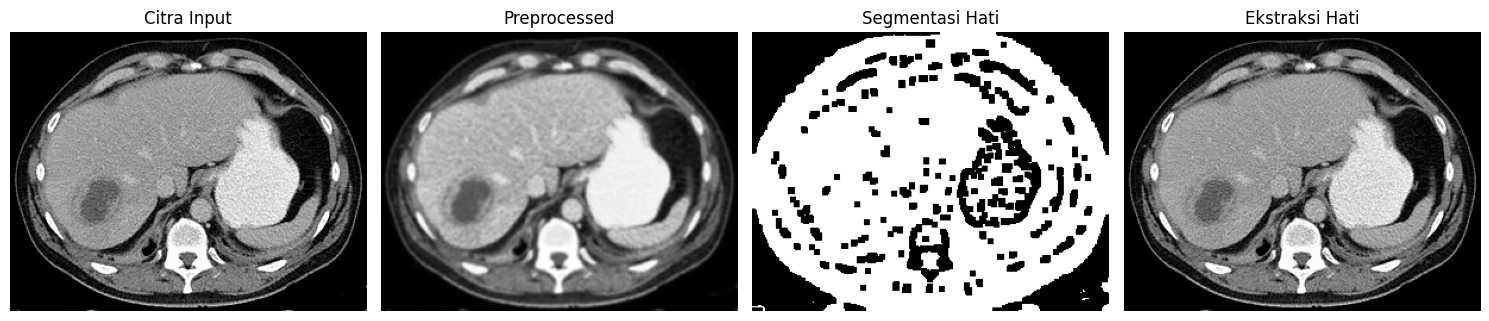

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def preprocess_image(image):
    """
    Preprocessing gambar: grayscale, histogram equalization, dan Gaussian blur.
    """
    # Konversi ke grayscale
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

    # Histogram equalization untuk meningkatkan kontras
    equalized = cv2.equalizeHist(gray)

    # Gaussian blur untuk mengurangi noise
    blurred = cv2.GaussianBlur(equalized, (5, 5), 0)

    return blurred

def liver_segmentation(image):
    """
    Segmentasi hati menggunakan adaptive thresholding.
    """
    # Adaptive thresholding
    thresholded = cv2.adaptiveThreshold(image, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C,
                                        cv2.THRESH_BINARY_INV, 11, 2)

    # Morphological operation untuk membersihkan hasil
    kernel = np.ones((5, 5), np.uint8)
    morph = cv2.morphologyEx(thresholded, cv2.MORPH_CLOSE, kernel)

    return morph

def extract_liver_region(segmented, original_image):
    """
    Ekstraksi area hati berdasarkan segmentasi.
    """
    # Cari kontur
    contours, _ = cv2.findContours(segmented, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

    # Filter kontur berdasarkan ukuran (hindari noise kecil)
    liver_contour = max(contours, key=cv2.contourArea)  # Pilih kontur terbesar

    # Buat mask baru untuk hati
    liver_mask = np.zeros_like(segmented)
    cv2.drawContours(liver_mask, [liver_contour], -1, 255, thickness=cv2.FILLED)

    # Gabungkan mask dengan gambar asli
    liver_segmented = cv2.bitwise_and(original_image, original_image, mask=liver_mask)

    return liver_segmented, liver_mask

# Load gambar
image_path = '/content/liver.jpg'  # Path ke gambar input
image = cv2.imread(image_path)

# Preprocessing
preprocessed = preprocess_image(image)

# Segmentasi hati
segmented = liver_segmentation(preprocessed)

# Ekstraksi area hati
liver_segmented, liver_mask = extract_liver_region(segmented, image)

# Visualisasi hasil
plt.figure(figsize=(15, 5))
plt.subplot(1, 4, 1)
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.title("Citra Input")
plt.axis("off")

plt.subplot(1, 4, 2)
plt.imshow(preprocessed, cmap='gray')
plt.title("Preprocessed")
plt.axis("off")

plt.subplot(1, 4, 3)
plt.imshow(segmented, cmap='gray')
plt.title("Segmentasi Hati")
plt.axis("off")

plt.subplot(1, 4, 4)
plt.imshow(cv2.cvtColor(liver_segmented, cv2.COLOR_BGR2RGB))
plt.title("Ekstraksi Hati")
plt.axis("off")

plt.tight_layout()
plt.show()
